In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as mp

In [48]:
books = pd.read_csv("books.csv")
users = pd.read_csv("users.csv")
ratings = pd.read_csv("ratings.csv")

C:\Users\ravan\AppData\Local\Temp\ipykernel_28224\2028538187.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv("books.csv")


In [88]:
print(ratings.shape)
print(users.shape)
print(books.shape)
books["Image-URL-S"]

(1149780, 3)
(278858, 3)
(271360, 8)


0         http://images.amazon.com/images/P/0195153448.0...
1         http://images.amazon.com/images/P/0002005018.0...
2         http://images.amazon.com/images/P/0060973129.0...
3         http://images.amazon.com/images/P/0374157065.0...
4         http://images.amazon.com/images/P/0393045218.0...
                                ...                        
271355    http://images.amazon.com/images/P/0440400988.0...
271356    http://images.amazon.com/images/P/0525447644.0...
271357    http://images.amazon.com/images/P/006008667X.0...
271358    http://images.amazon.com/images/P/0192126040.0...
271359    http://images.amazon.com/images/P/0767409752.0...
Name: Image-URL-S, Length: 271360, dtype: object

In [20]:
print("users missing values")
print(users.isnull().sum())
print("books missing values")
print(books.isnull().sum())
print("ratings missing values")
print(ratings.isnull().sum())

users missing values
User-ID          0
Location         0
Age         110762
dtype: int64
books missing values
ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64
ratings missing values
User-ID        0
ISBN           0
Book-Rating    0
dtype: int64


In [21]:
print(books.duplicated().sum())
print(ratings.duplicated().sum())
print(users.duplicated().sum())

0
0
0


## BOOKS EDL

In [32]:
books.head()
# books["Year-Of-Publication"].unique()
# books[books["Year-Of-Publication"]==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [27]:
Books_group_yearwise = books.groupby("Year-Of-Publication")["ISBN"].count()
Books_group_yearwise

Year-Of-Publication
0                    3570
1806                    1
1900                    1
1901                    7
1902                    2
                     ... 
2024                    1
2030                    3
2037                    1
DK Publishing Inc       2
Gallimard               1
Name: ISBN, Length: 202, dtype: int64

### For most of the books Year Of Publication is not mention


In [36]:
Books_groupby_Publisher = books.groupby("Publisher")["ISBN"].count()
Books_groupby_Publisher.sort_values( ascending=False).head()

Publisher
Harlequin           7535
Silhouette          4220
Pocket              3905
Ballantine Books    3783
Bantam Books        3646
Name: ISBN, dtype: int64

## top 5 publisher
### Harlequin,           Silhouette,        Pocket,              Ballantine Books,     Bantam Books        

## Top 5 Aurthor with most numbers of published books

In [37]:
Books_groupby_aurthor = books.groupby("Book-Author")["ISBN"].count()
Books_groupby_aurthor.sort_values(ascending=False).head()

Book-Author
Agatha Christie        632
William Shakespeare    567
Stephen King           524
Ann M. Martin          423
Carolyn Keene          373
Name: ISBN, dtype: int64

## USERS EDL

In [86]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0


In [49]:
print(users["Age"].dtype)
users.isna().sum()


float64


User-ID          0
Location         0
Age         110762
dtype: int64

In [50]:
users["Age"] = users["Age"].fillna(users["Age"].median())
users

,User-ID,Location,Age
0,1,"nyc, new york, usa",32.0
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",32.0
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",32.0
...,...,...,...
278853,278854,"portland, oregon, usa",32.0
278854,278855,"tacoma, washington, united kingdom",50.0
278855,278856,"brampton, ontario, canada",32.0
278856,278857,"knoxville, tennessee, usa",32.0


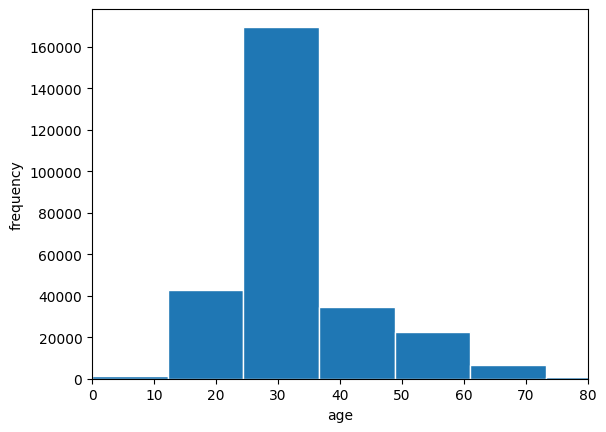

In [74]:
mp.hist(users["Age"],bins=20, edgecolor="white")
mp.xlim(0, 80)
mp.xlabel("age")
mp.ylabel("frequency")

mp.show()

## users whose age is ranegs between 25 to 38 gives most reviews

## RATINGS EDL

In [75]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [82]:
User_Rating = users.merge(ratings,on="User-ID",how="inner")
# print(users.head())
# print(ratings.head())
User_Rating.head()

,User-ID,Location,Age,ISBN,Book-Rating
0,2,"stockton, california, usa",18.0,0195153448,0
1,7,"washington, dc, usa",32.0,034542252,0
2,8,"timmins, ontario, canada",32.0,0002005018,5
3,8,"timmins, ontario, canada",32.0,0060973129,0
4,8,"timmins, ontario, canada",32.0,0374157065,0


In [85]:
users_review_count = User_Rating.groupby("User-ID")["Book-Rating"].count()
users_review_count.sort_values(ascending=False).head()

User-ID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
Name: Book-Rating, dtype: int64

In [79]:
user_rating_book = User_Rating.merge(books,on="ISBN",how="inner")

In [87]:
user_rating_book.head()

,User-ID,Location,Age,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,2,"stockton, california, usa",18.0,0195153448,0,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,8,"timmins, ontario, canada",32.0,0002005018,5,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,8,"timmins, ontario, canada",32.0,0060973129,0,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,8,"timmins, ontario, canada",32.0,0374157065,0,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,8,"timmins, ontario, canada",32.0,0393045218,0,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...
